In [26]:
import pandas as pd
import numpy as np

### Mini-Project 1

Instructions: Collect comments from a post of your choice on reddit. 
Conduct analysis you think will be helpful in helping you understand 
how people responded to the topic

In [3]:
reddit_post_url = 'https://www.reddit.com/r/ApplyingToCollege/comments/uwye24/should_i_attend_ucsd/'

In [11]:
resp_id = [0, 1, 2, 3, 4, 5, 6, 7]
author = ['Johnnybala', 'throwawaygremlins', 'Odd-Swim-434', 'TheOfficialSkY45', 'OkQuiet2444', 'Ineedluck18', 'Odd-Swim-434', '[deleted]']
resp_attr = ['Opinion', 'Opinion with Evidence', 'Opinion with Evidence', 'Opinion', 'Opinion with Evidence', 'Irrelavence Conversation', 'Irrelavence Conversation', 'Personal Anecdote']
resp_length = [0, 0, 0, 0, 0, 0, 0, 0]
resp_cont = ['Accept UCSD, great school. Sort out the rest as you can.', 
             '''INFO:

                Cost is not a factor to go to UCSD? Then I would go.

                You would eventually want to go to Physician Assistant school- am I getting that right?

                You should go to UCSD, great school.''', 
             '''Cost isn't a factor because I got an amazing financial aid package and have some scholarships that cut the cost to almost nothing. Yes, it's my plan to attend Physician Assistant school after getting my bachelors.''',
             'Yea',
             'You’ll be able to visit your family in Glendale if you go to UCSD. Take Amtrak and it’s not that far away.',
             'When did u get off the waitlist? Today?', 
             'I got off the waitlist on May 18th.',
             '''I had a really hard decision deciding between GT and UCSD for CS. I ultimately decided on UCSD because it's just such a nice school. It's just large enough, but it's also not too big. The classes are not too crowded, despite being larger in size. On top of that, San Diego is just so beautiful.

                To your comment about visiting family, that's pretty hard, but SD has the trolley which goes all the way up near LA. You'll definitely be able to visit them pretty often! I live in the Bay Area lol.'''
            ]
like = [9, 4, 3, 2, 2, 1, 3, 1]
dislike = [0, 0, 0, 0, 0, 0, 0, 0]
has_reply = ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No']
resp_num = [0, 1, 0, 0, 0, 1, 0, 0]
data = {'resp_id': resp_id, 'author': author, 'resp_attr': resp_attr, 'resp_length': resp_length, 'resp_cont': resp_cont, 'like': like, 'dislike': dislike, 'has_reply': has_reply, 'resp_num': resp_num}

In [12]:
df = pd.DataFrame(data = data, columns = ['resp_id', 'author', 'resp_attr', 'resp_length', 'resp_cont', 'like', 'dislike' 'has_reply', 'resp_num'])

In [15]:
df.resp_length = df['resp_cont'].apply(lambda x: len(x))

In [16]:
df

,resp_id,author,resp_attr,resp_length,resp_cont,like,dislike,resp_date,has_reply,resp_num
0,0,Johnnybala,Opinion,56,"Accept UCSD, great school. Sort out the rest a...",9,0,NaN,No,0
1,1,throwawaygremlins,Opinion with Evidence,234,INFO:\n\n Cost is not a factor ...,4,0,NaN,Yes,1
2,2,Odd-Swim-434,Opinion with Evidence,213,Cost isn't a factor because I got an amazing f...,3,0,NaN,No,0
3,3,TheOfficialSkY45,Opinion,3,Yea,2,0,NaN,No,0
4,4,OkQuiet2444,Opinion with Evidence,106,You’ll be able to visit your family in Glendal...,2,0,NaN,No,0
5,5,Ineedluck18,Irrelavence Conversation,39,When did u get off the waitlist? Today?,1,0,NaN,Yes,1
6,6,Odd-Swim-434,Irrelavence Conversation,35,I got off the waitlist on May 18th.,3,0,NaN,No,0
7,7,[deleted],Personal Anecdote,510,I had a really hard decision deciding between ...,1,0,NaN,No,0


In [18]:
df[['resp_length', 'like', 'dislike', 'resp_num']].describe()

,resp_length,like,dislike,resp_num
count,8.000000,8.000000,8.0,8.00000
mean,149.500000,3.125000,0.0,0.25000
std,168.416999,2.587746,0.0,0.46291
min,3.000000,1.000000,0.0,0.00000
25%,38.000000,1.750000,0.0,0.00000
50%,81.000000,2.500000,0.0,0.00000
75%,218.250000,3.250000,0.0,0.25000
max,510.000000,9.000000,0.0,1.00000


<AxesSubplot:>

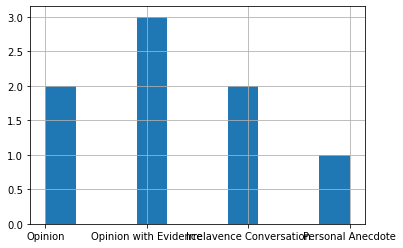

In [20]:
df['resp_attr'].hist()

<AxesSubplot:>

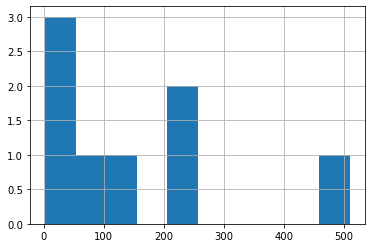

In [22]:
df['resp_length'].hist()

In [36]:
table = pd.pivot_table(df, values=['resp_length', 'like', 'dislike', 'resp_num'], index=['has_reply'],
                    aggfunc={'resp_length': [min, max, np.mean, np.median, 'count'],
                             'like': [min, max, np.mean, np.median],
                             'dislike': [min, max, np.mean, np.median],
                             'resp_num': [min, max, np.mean, np.median]
                            })

In [37]:
table

dislike                 like                      resp_length       \
              max mean median min  max      mean median min       count  max   
has_reply                                                                      
No              0  0.0    0.0   0    9  3.333333    2.5   1           6  510   
Yes             0  0.0    0.0   0    4  2.500000    2.5   1           2  234   

                                 resp_num                  
                 mean median min      max mean median min  
has_reply                                                  
No         153.833333   81.0   3        0  0.0    0.0   0  
Yes        136.500000  136.5  39        1  1.0    1.0   1

Analysis:
There are three types of responses to the post that I selected. The first type is opinion based response which simply just includes whether or not the respondent thinks the person should go to UCSD. There lacks supporting evidence or reasons to back up the opinions. The second type is engaging response with supporting arguments. The response not only includes an opinion but also contains the reasons why the respondent believes it is a good or not a good choice to attend UCSD. The third kind of response is irrelevant conversation that diverges from the topic. For example, people started to ask questions like “When did you get off the waitlist?” or about their own personal experiences that has little relevance to the topic. However, the second type of responses seem to have the highest response rate among the three. More people seem to engage in the conversation if there is supporting evidence or fact.


### Mini-Project 2

Mini Project 2
Instructions: Develop of a list of rules or tasks people can follow to determine the legitimacy of information they find online. Please also keep a list of the references you used to create the list

1.	Source/Author Reputation
2.	When is the information published?
3.	Did the information contain fact and evidence? Or is it just simple opinion?
4.	Did other posts have similar information? Did it line up with other posts?
5.	Are there any spelling or grammar errors?
6.	What is the purpose of the information? Is it to inform or persuade?
7.	Any potential bias?
8.	Misleading title?

Source: https://www.uow.edu.au/student/learning-co-op/finding-and-using-information/evaluating-the-quality-of-online-information/

https://www.colorado.edu/faculty/lehmantamara/sites/default/files/attached-files/crv-asonam-2020_paper_150.pdf
